In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('csv/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [7]:
count_missing = df.isnull().sum()
missing = count_missing[count_missing>0]
df[missing.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
Age         714 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(1), object(2)
memory usage: 21.0+ KB


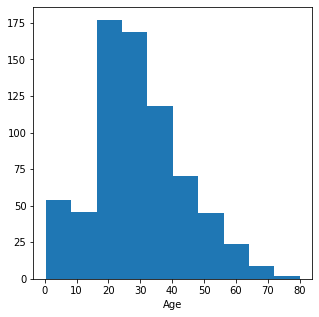

In [9]:
plt.figure(figsize=(5,5))

plt.subplot(1,1,1)
plt.hist(df['Age'])
plt.xlabel('Age')

plt.show();

In [10]:
median = df[['Age']].median(axis=0)
df[['Age']]=df[['Age']].fillna(median,axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df[['Age']].isnull().sum()

Age    0
dtype: int64

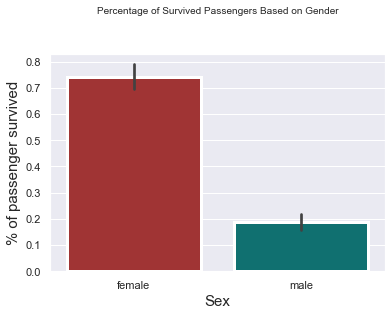

In [25]:
import seaborn as sns
pal = {'male':"teal", 'female':"firebrick"}
sns.set(style="darkgrid")
plt.subplots(figsize = (6,4))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=df, 
                 palette = pal,
                 linewidth=3,
                 order = ['female','male'],
                 
                )

plt.title("Percentage of Survived Passengers Based on Gender", fontsize = 10,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

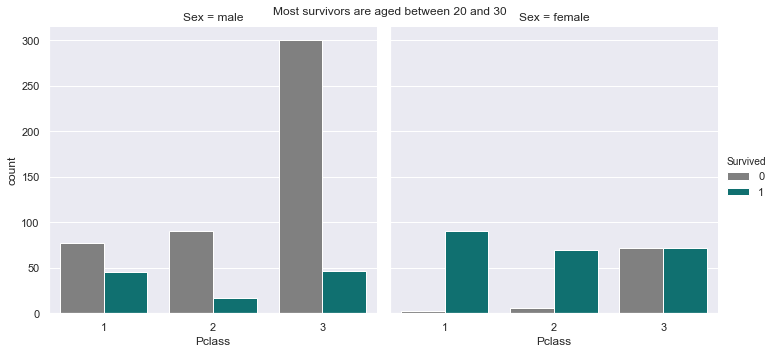

In [35]:
g = sns.catplot(x="Pclass", hue="Survived", col="Sex",
                 data=df, kind="count",

                palette = {1:"teal", 0:"gray"}
               )
g.fig.suptitle("Most survivors are aged between 20 and 30", size = 12);

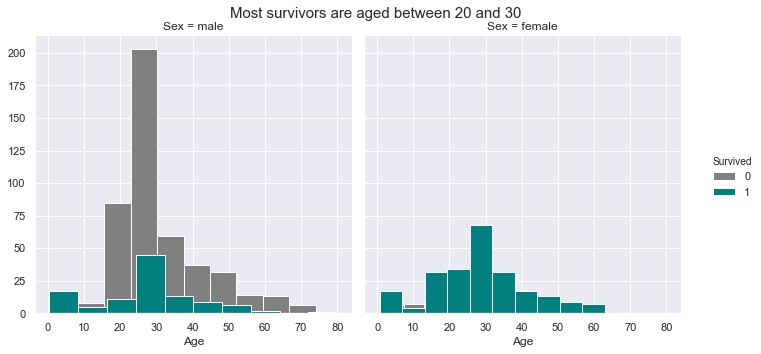

In [27]:
pal = {1:"teal", 0:"gray"}
g = sns.FacetGrid(df,size=5, col="Sex" , margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Most survivors are aged between 20 and 30", size = 15)
plt.subplots_adjust(top=0.90);